In [1]:
%pip install pandas matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('apps.csv')

# 1. Clean 'Installs' column (remove '+' and ',')
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# 2. Clean 'Price' column (remove '$')
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# 3. Drop rows with missing Ratings
df = df.dropna(subset=['Rating'])

print(f"Dataset cleaned. Remaining rows: {len(df)}")
df.head()

Dataset cleaned. Remaining rows: 8196


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<ipython-input-3-710c1a940f28>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


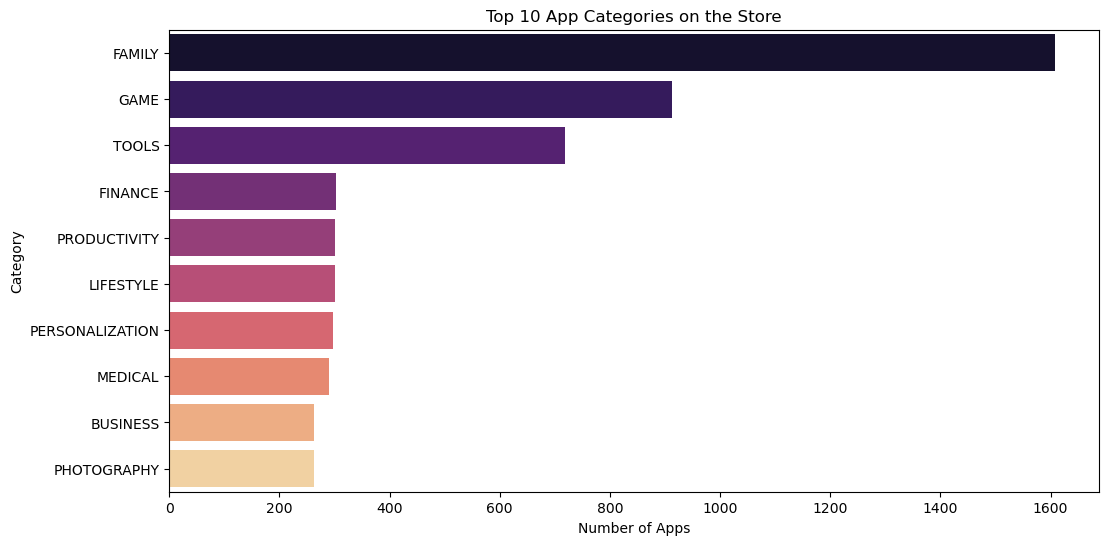

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Categories by App Count
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 10 App Categories on the Store')
plt.xlabel('Number of Apps')
plt.show()

<Figure size 1000x600 with 0 Axes>

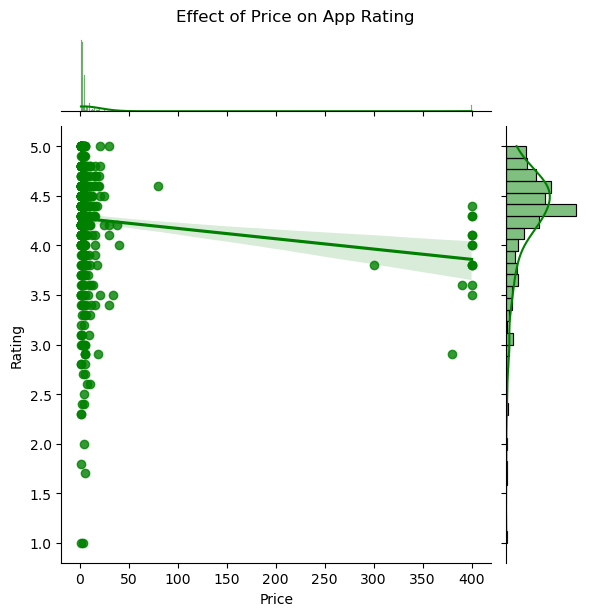

In [4]:
# Filter for paid apps only to see the correlation
paid_apps = df[df['Type'] == 'Paid']

plt.figure(figsize=(10, 6))
sns.jointplot(x='Price', y='Rating', data=paid_apps, kind='reg', color='g')
plt.suptitle('Effect of Price on App Rating', y=1.02)
plt.show()

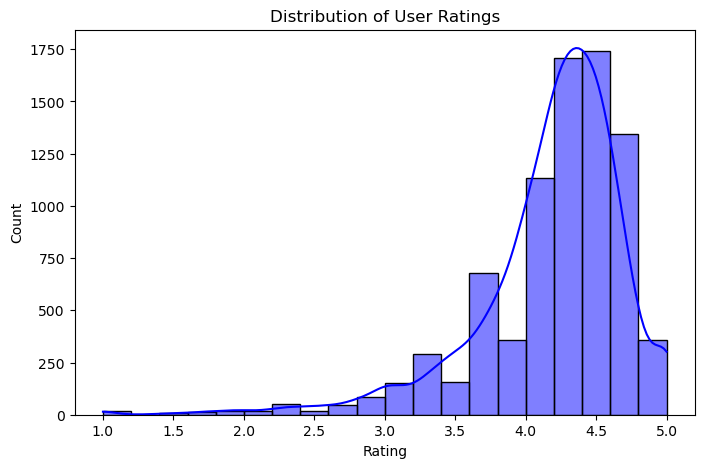

In [5]:
# Example: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of User Ratings')
plt.show()